<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_03_2_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 3: Convolutional Neural Networks (CNN's)**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 3 Material

* Part 3.1: Using Convolutional Neural Networks
* **Part 3.2: Using Pre-Trained Neural Networks with Keras**
* Part 3.3: Facial Recognition and Analysis
* Part 3.4: Introduction to GAN's for Image and Data Generation

## **Change your Runtime Now!**

For this lesson you should pick a GPU hardware accelerator like the `A100` if its available.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [1]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image01A.png)

If your GMAIL address does not appear your lesson will **not** be graded.

## Accelerated Run-time Check

You MUST run the following code cell to get credit for this class lesson. The code in this cell checks what hardware acceleration you are using. To run this lesson, you must be running a Graphics Processing Unit (GPU).

In [2]:
# You must run this cell second

import tensorflow as tf

# ------------------------------------------------------------------------
# 0️⃣  Create check_device() function
# ------------------------------------------------------------------------

def check_device():
    # Check for available devices
    devices = tf.config.list_physical_devices()

    # Initialize device flags
    cpu = False
    gpu = False
    tpu = False

    # Check device types
    for device in devices:
        if device.device_type == 'CPU':
            cpu = True
        elif device.device_type == 'GPU':
            gpu = True
        elif device.device_type == 'TPU':
            tpu = True

    # Output device status
    if tpu:
        print("Running on TPU")
        print("WARNING: You must run this assigment using a GPU to earn credit")
        print("Change your RUNTIME now!")
    elif gpu:
        print("Running on GPU")
        gpu_info = !nvidia-smi
        gpu_info = '\n'.join(gpu_info)
        print(gpu_info)
        print("You are using a GPU hardware accelerator--You're good to go!")
    elif cpu:
        print("Running on CPU")
        print("WARNING: You must run this assigment using a GPU to earn credit")
        print("Change your RUNTIME now!")
    else:
        print("No compatible device found")
        print("WARNING: You must run this assigment using either a GPU or a TPU to earn credit")
        print("Change your RUNTIME now!")

# ------------------------------------------------------------------------
# 1️⃣  Call function
# ------------------------------------------------------------------------

check_device()

Running on GPU
Mon Aug 18 16:59:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             44W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+--------------------------------

If you current `Runtime` is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_4_image11A.png)

However, if you received this warning message

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_4_image14A.png)

You **MUST** go back and change your `Runtime` now before you continue.

### Create Custom Function

The cell below creates a custom function needed for this lesson. If you fail to run this cell now, you will receive one (or more) error message(s) later in this lesson.

In [3]:
# Create functions for this lesson

# ------------------------------------------------------------------------
# 0️⃣  Create custom function
# ------------------------------------------------------------------------

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

### Install Pre-Trained Neural Network `ResNet50`

In [4]:
# Download Pre-Trained neural network

import tensorflow.keras
from tensorflow.keras.applications import ResNet50

ResNet50_model = ResNet50(weights='imagenet',include_top=True)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image26C.png)

Show model

In [5]:
# Show model structure

ResNet50_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

### Install Functions

The code in the cell below creates a two functions that we will need to use classify images using ResNet50.

* **make_square()** Since MobileNet is designed to classify images with the same number of horizontal and vertical pixels (i.e. a 'square' image), this function uses a combination of padding and cropping to convert any image into a 'square` image.

* **classify_image()** This function does most of the work. It first retrives the image from the HTTPS server and resizes it before processing it by the `ResNet50 model` that we previously downloaded. The actual prediction is made by this line of code:
```text
  pred = model.predict(x)
```

In [6]:
# Install functions

# %matplotlib inline   # uncomment if you are in a Jupyter notebook

# ----------------------------------------------------------------------
# Imports
# ----------------------------------------------------------------------
from PIL import Image, ImageFile, UnidentifiedImageError
import requests
import numpy as np
from io import BytesIO
from IPython.display import display

from tensorflow.keras.applications.resnet import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image

# ----------------------------------------------------------------------
# Global settings
# ----------------------------------------------------------------------
IMAGE_WIDTH, IMAGE_HEIGHT = 224, 224          # target resolution
ImageFile.LOAD_TRUNCATED_IMAGES = False       # keep the default behaviour

# Load the pretrained ResNet‑50 model
ResNet_model = ResNet50(weights='imagenet')

# Base URL of the images
ROOT = "https://biologicslab.co/BIO1173/images/class_03/"

# ----------------------------------------------------------------------
# Utility functions
# ----------------------------------------------------------------------
def make_square(img):
    """
    Crop the image to a square (center‑aligned).
    """
    width, height = img.size
    side = min(width, height)
    left   = (width  - side) // 2
    top    = (height - side) // 2
    right  = left + side
    bottom = top  + side
    return img.crop((left, top, right, bottom))

# ----------------------------------------------------------------------
# Core function
# ----------------------------------------------------------------------
def classify_image(url):
    """
    Download an image from *url*, preprocess it, run it through ResNet‑50,
    display the image and print the top‑5 ImageNet predictions.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()          # raise an error on bad status
        img = Image.open(BytesIO(response.content)).convert('RGB')
    except UnidentifiedImageError:
        print("Error: Cannot identify image file. Check the image URL or file format.")
        return
    except Exception as e:
        print(f"Error while downloading or opening the image: {e}")
        return

    # Resize (or square‑crop first if you prefer)
    img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT), Image.LANCZOS)

    # Preprocess
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict
    preds = ResNet50_model.predict(x)

    # Show the image
    display(img)

    # Print the top‑5 predictions
    print("\nTop‑5 predictions:")
    for pred in decode_predictions(preds, top=5)[0]:
        print(f"  {pred[1]:<25} : {pred[2]*100:5.2f}%")




### Example 1: Classify Images with ResNet50

The code in the cell below downloads an image of a dog from the course fileserver, https://biologicslab.co and then uses the pre-trained `ResNet50` neural network to to classify it.

#[___](https://biologicslab.co/BIO1173/images/class_03/Retina_Score_0.png)

Analyzing  https://biologicslab.co/BIO1173/images/class_03/pembroke_corgi.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


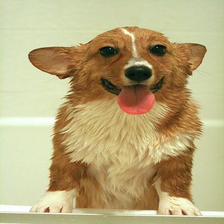


Top‑5 predictions:
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
  Pembroke                  : 95.85%
  Cardigan                  :  3.63%
  Norwich_terrier           :  0.25%
  tub                       :  0.10%
  Australian_terrier        :  0.04%


In [7]:
# Example 1: Classify Image with ResNet50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input

# Enter image name
image_name="pembroke_corgi.jpg"

# Generate image path
image_path=ROOT+image_name

# Print path
print(f"Analyzing ", image_path)

# Use ResNet50 to classify image
classify_image(image_path)

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image25C.png)

Clearly, `ResNet50` has been trained to recognize a dog in an image. What is somewhat interesting, is that `ResNet50` appears to be quite good as to correctly identify a dog's breed. This is indeed a picture of a dog breed known as a `Welsh Pembroke Corgi`.

### **Exercise 1: Classify Images with ResNet50**

In the cell below write the code to download an another image of dog from the course fileserver and then uses `ResNet50` to classify it.

```type
`image_name="bouvier_des_flandres.jpg"`
```


#[___](https://biologicslab.co/BIO1173/images/class_03/Retina_Score_0.png)

Analyzing  https://biologicslab.co/BIO1173/images/class_03/bouvier_des_flandres.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


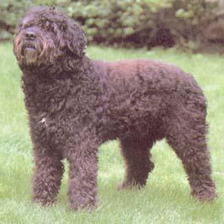


Top‑5 predictions:
  Irish_water_spaniel       : 61.85%
  Bouvier_des_Flandres      : 29.28%
  briard                    :  2.37%
  miniature_poodle          :  1.41%
  Kerry_blue_terrier        :  1.02%


In [8]:
# Example 1: Classify Image with ResNet50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input

# Enter image name
image_name="bouvier_des_flandres.jpg"

# Generate image path
image_path=ROOT+image_name

# Print path
print(f"Analyzing ", image_path)

# Use ResNet50 to classify image
classify_image(image_path)

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image27C.png)

This time `ResNet50` got a little confused. It was "pretty sure" (62%) that the dog in the image was an `Irish water spaniel`.

![___](https://biologicslab.co/BIO1173/images/class_03/IrishWaterSpaniel.jpg)
**Irish Water Spaniel**

However, `ResNet50`'s second guess -- with a 29% certainty--was correct, a `Bouvier des Flandres`.

I would expect that even with this error, `ResNet50` is still probably much better at identifying dog breeds than the average person.

### Example 2: classify Retinal Image with ResNet50

In the cell below write the code to analyse the following retinal image:
```text
"Retina_Score_0.png"
```


Analyzing  https://biologicslab.co/BIO1173/images/class_03/Retina_Score_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


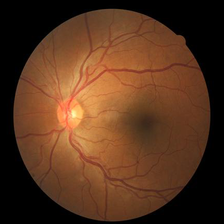


Top‑5 predictions:
  lampshade                 : 84.45%
  balloon                   :  9.33%
  chambered_nautilus        :  0.91%
  jellyfish                 :  0.49%
  mask                      :  0.31%


In [9]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input

# Enter image name
image_name="Retina_Score_0.png"

# Generate image path
image_path=ROOT+image_name

# Print path
print(f"Analyzing ", image_path)

# Use ResNet50 to classify image
classify_image(image_path)

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image20C.png)

Analyzing  https://biologicslab.co/BIO1173/images/class_03/Retina_Score_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


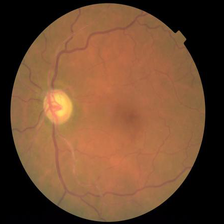


Top‑5 predictions:
  lampshade                 : 27.49%
  jellyfish                 : 27.40%
  balloon                   :  9.41%
  gong                      :  8.80%
  chime                     :  3.31%


In [10]:
# Insert your code for Exercise 1A here

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input

# Enter image name
image_name="Retina_Score_1.png"

# Generate image path
image_path=ROOT+image_name

# Print path
print(f"Analyzing ", image_path)

# Use ResNet50 to classify image
classify_image(image_path)

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image21C.png)

# **Transfer Learning for Computer Vision**

## **`ResNet`**

Many advanced prebuilt neural networks are available for computer vision, and Keras provides direct access to many networks. **Transfer Learning** is the technique where you use these prebuilt neural networks.

There are several different levels of transfer learning.

* Use a prebuilt neural network in its entirety
* Use a prebuilt neural network's structure
* Use a prebuilt neural network's weights

In this lesson we will use a popular prebuilt CNN called **`ResNet (Residual Network)`** built by Microsoft Research in 2015. The name comes from the fact that this network was designed to address the **vanishing gradient problem** that occurs when training very deep neural networks.

Instead of learning the direct mapping from input to output, `ResNet` learns the residual (i.e., the difference between the input and the output).
This is achieved using **skip connections** (also called shortcut connections), which allow the input to bypass one or more layers and be added directly to the output.

## **Transfer Learning**

**Transfer learning** is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. In the context of image recognition, this approach is particularly effective when using deep convolutional neural networks (CNNs) like **ResNet (Residual Network)**.

### **Why Use Transfer Learning?**

Training deep neural networks from scratch requires large datasets and significant computational resources. Transfer learning mitigates this by leveraging pre-trained models—typically trained on large benchmark datasets like ImageNet—to extract general features from images. These features can then be fine-tuned for a specific task with a smaller, domain-specific dataset.

### **How `ResNet` Supports Transfer Learning**

`ResNet` is a widely used CNN architecture known for its use of **residual connections**, which help in training very deep networks by addressing the vanishing gradient problem. Pre-trained versions of `ResNet` (e.g., `ResNet-50`, `ResNet-101`) are commonly used as feature extractors in transfer learning workflows.

### **Benefits**

- **Reduced Training Time**: Leverages existing learned features.
- **Improved Performance**: Often achieves better accuracy with less data.
- **Flexibility**: Can be adapted to a wide range of image classification tasks.

Transfer learning with `ResNet` is a powerful and efficient approach for developing high-performing image recognition models, especially when data or computational resources are limited.


## **Improving `ResNet` Classification Accuracy of Diabetic Retinopathy**

We know from Example 2 and **Exercise 2** that while `ResNet50` might be very good when it comes to image analysis of everyday items, like dogs, it is spectacularly horrible when it comes analyzing images of the human retina. For example, in **Exercise 2**, `ResNet50` guessed that the image of a retina was:
```text
Top‑5 predictions:
  lampshade                 : 27.49%
  jellyfish                 : 27.40%
  balloon                   :  9.41%
  gong                      :  8.80%
  chime                     :  3.31%
```
So in Example 3 and **Exercise 3** we are going use `ResNet` and **transfer learning** to "teach" `ResNet` about the effects of diabetes on the human retina.

#### **Diabetic Retinopathy Image Dataset Classes**

The dataset we will be using categorizes retinal images into **five classes** based on the severity of diabetic retinopathy. These classes represent a progression from healthy retinas to increasingly severe stages of the disease:

1. **Class 0** - No Diabetic Retinopathy (No_DR)
2. **Class 1** - Mild Non-Proliferative Diabetic Retinopathy (NPDR)
3. **Class 2** - Moderate NPDR
4. **Class 3** - Severe NPDR
5. **Class 4** - Proliferative Diabetic Retinopathy (PDR)

An example of each class is shown in this image:

![__](https://biologicslab.co/BIO1173/images/class_03/DiabeticRetinopathyData.png)

It should be noted that differences in apparent retinal size has nothing to do with the degree of retinopathy but instead reflects the fact that the retinal images were taken by a large number of clinicians, with different imaging equipment and procedures. In other words, there is considerable "noise" in the image set.



### Install `keras_preprocessing`

The Keras function `ImageDataGenerator` is part of the Keras package `keras_preprocessing`. We need to install `keras_preprocessing` now so we can setup our `ImageDataGenerator`.

In [11]:
# Install Keras package

!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image06C.png)

# Example 3 -- Diagnosis of Diabetic Retinopathy

We know from Example 2 and **Exercise 2** that the pre-trained neural network `ResNet50` might be extremely good when it comes to image analysis when it comes to dogs, but is spectacularly horrible when it comes to images of the human retina.

#### **Diabetic Retinopathy Image Dataset Classes**

The image dataset that we will be using contains over **35,000** retinal images clinical labeled into **five classes** based on the severity of their diabetic retinopathy. These classes represent a progression from healthy retinas to increasingly severe stages of the disease.

1. **Class 0** - No Diabetic Retinopathy (No_DR)
2. **Class 1** - Mild Non-Proliferative Diabetic Retinopathy (NPDR)
3. **Class 2** - Moderate NPDR
4. **Class 3** - Severe NPDR
5. **Class 4** - Proliferative Diabetic Retinopathy (PDR)

An example of each class is shown in this image:

![__](https://biologicslab.co/BIO1173/images/class_03/DiabeticRetinopathyData.png)
**Progression of Diabetic Retinopathy**

It should be noted that differences in apparent retinal size has nothing to do with the degree of retinopathy but instead reflect the fact that the 35,126 retinal images in the dataset were taken by a large number of clinicians, using different imaging equipment and following somewhat different protocols. In other words, there is considerable "noise" in the image set which will make it more difficult for our classification neural network.

### Example 3 - Step 1: Set ENVIRONMENTAL VARIABLES

The code in the cell below defines a number of `ENVIRONMENTAL VARIABLES` that are needed for later code cells. **Enivornment Variables** can  allow code to be **configurable without modification**. For example, you might use different database URLs for development, testing, and production environments.

In [70]:
# Example 3 - Step 1: Set ENVIRONMENTAL VARIABLES

import os

# ------------------------------------------------------------------------
# 1️⃣  Create variables for downloading loading Zip file
# ------------------------------------------------------------------------
URL = "https://biologicslab.co/BIO1173/data/"
DOWNLOAD_SOURCE = URL+"diabetic_retinopathy_train_244.zip"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print("DOWNLOAD_SOURCE=",DOWNLOAD_SOURCE)
print("DOWNLOAD_NAME=",DOWNLOAD_NAME)

# ------------------------------------------------------------------------
# 2️⃣  Create variables for extracting the Zip file
# ------------------------------------------------------------------------
PATH = "./"
EXTRACT_TARGET = os.path.join(PATH,"retinopathy_244")
SOURCE = os.path.join(EXTRACT_TARGET, "train_244")
print("EXTRACT_TARGET=",EXTRACT_TARGET)
print("SOURCE=",SOURCE)

# ------------------------------------------------------------------------
# 3️⃣  Print variables for debugging
# ------------------------------------------------------------------------
print("ENVIRONMENTAL VARIABLES were successfully created.")

DOWNLOAD_SOURCE= https://biologicslab.co/BIO1173/data/diabetic_retinopathy_train_244.zip
DOWNLOAD_NAME= diabetic_retinopathy_train_244.zip
EXTRACT_TARGET= ./retinopathy_244
SOURCE= ./retinopathy_244/train_244
ENVIRONMENTAL VARIABLES were successfully created.


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image08C.png)

In [72]:
!rm diabetic_retinopathy_train_244.zip

In [73]:
!rm -rf ./retinopathy_512

In [74]:
!rm -rf ./retinopathy_244

In [77]:
!ls ./

diabetic_retinopathy_train_244.zip  drive  retinopathy_244  sample_data


### Example 3 - Step 2: Download and Extract Image Data

The code in the cell below downloads a zip file from the course HTTPS server, `https://biologicslab.co/BIO1173/data`, called `diabetic_retinopathy.zip`.

The code then extracts (unzips) the zip file into a new folder called `/retinopathy`.

In [76]:
# Example 3 - Step 2: Download and Extract Data

import os

# --------------------------------------------------------------
# 1️⃣  Create directories
# --------------------------------------------------------------
print("Creating necessary directories...", end='')
# Create necessary directories
os.makedirs(SOURCE, exist_ok=True)
os.makedirs(EXTRACT_TARGET, exist_ok=True)
print("done.")

# --------------------------------------------------------------
# 2️⃣  Download Zip file
# --------------------------------------------------------------
print("Downloading the Zip file...", end='')
# Define paths and URLs
download_path = os.path.join(PATH, DOWNLOAD_NAME)
extract_path = os.path.join(EXTRACT_TARGET, DOWNLOAD_NAME)
# Download the file
os.system(f"wget -O {DOWNLOAD_NAME} {DOWNLOAD_SOURCE}")
print("done.")

# --------------------------------------------------------------
# 3️⃣  Extract Zip file
# --------------------------------------------------------------
print("Extracting the Zip file...", end='')
# Extract the file
os.system(f"unzip -q {DOWNLOAD_NAME} -d {EXTRACT_TARGET}")
print("done.")

# --------------------------------------------------------------
# 4️⃣  Verity Extraction was sucessful
# --------------------------------------------------------------
print("Verify Extraction")
!ls -l {EXTRACT_TARGET} | head

Creating necessary directories...done.
Extracting the Zip file...done.
Verify Extraction
total 1628
drwxr-xr-x 2 root root 1196032 Aug 18 20:06 train_244
-rw-rw---- 1 root root  465317 Feb  6  2015 trainLabels.csv


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image28C.png)

In [16]:
!ls -Fla ./retinopathy_244/

total 1640
drwxr-xr-x 3 root root    4096 Aug 18 17:04 ./
drwxr-xr-x 1 root root    4096 Aug 18 17:03 ../
drwxr-xr-x 2 root root 1196032 Aug 18 17:04 train_244/
-rw-rw---- 1 root root  465317 Feb  6  2015 trainLabels.csv


### Example 3 - Step 3: Check Image Data

In [17]:
# Example  3 - Step 3: Check image data

import os
import io
import shutil
from pathlib import Path
from PIL import Image

# Set Delete
DELETE  = True     # set to False if you only want to *report* the bad files

# ------------------------------------------------------------------
# 1️⃣  Utility: test a single file (exactly how ImageDataGenerator does it)
# ------------------------------------------------------------------
def _is_good_image(path: Path) -> bool:
    """Return True if Pillow can read the image, False otherwise."""
    try:
        with path.open("rb") as f:
            data = f.read()
        Image.open(io.BytesIO(data)).convert("RGB")
        return True
    except Exception:
        return False

# ------------------------------------------------------------------
# 2️⃣  Scan the whole directory tree
# ------------------------------------------------------------------
bad_files = []

for root, _dirs, files in os.walk(SOURCE):
    for fn in files:
        p = Path(root) / fn
        if not _is_good_image(p):
            bad_files.append(p)

print(f"Found {len(bad_files)} corrupt / unreadable images in {SOURCE}")

# ------------------------------------------------------------------
# 3️⃣  Delete (or rename) the bad files
# ------------------------------------------------------------------
if bad_files:
    if DELETE:
        for p in bad_files:
            try:
                # rename so you still have a copy you can inspect
                backup = p.with_suffix(p.suffix + ".corrupt")
                p.rename(backup)
                print(f"  → renamed {p} → {backup}")
            except OSError as e:
                print(f"  !! could not rename {p}: {e}")
        print(f"All {len(bad_files)} bad files have been renamed.")
    else:
        print("Set DELETE=True if you want to actually delete/rename them.")
else:
    print("No bad files to delete – you’re good to go!")

Found 2 corrupt / unreadable images in ./retinopathy_244/train_244
  → renamed retinopathy_244/train_244/info.height?info.height:info.width]x%[fx:info.width → retinopathy_244/train_244/info.height?info.height:info.width]x%[fx:info.width.corrupt
  → renamed retinopathy_244/train_244/info.height?info.height:info.width]+0+0 → retinopathy_244/train_244/info.height?info.height:info.width]+0+0.corrupt
All 2 bad files have been renamed.


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image29C.png)

### Example 3 - Step 4: Load the Labels for the Training Set

The file `trainLabels.csv` contains the label information for the images. This file has just two columns, **image** and **level**. The `image` specifies the image's filename and from which eye the image was obtained; for example, `10_left.png`. The `level` column contains the a numerical value between 0 and 4 which indicates the serverity of diabetic retinopathy.

1. **Class 0** - No Diabetic Retinopathy (No_DR)
2. **Class 1** - Mild Non-Proliferative Diabetic Retinopathy (NPDR)
3. **Class 2** - Moderate NPDR
4. **Class 3** - Severe NPDR
5. **Class 4** - Proliferative Diabetic Retinopathy (PDR)

These 5 classes represent a progression from healthy retinas to increasingly severe stages of the disease.

Our objective is to build a classification neural network that can learn to classify retinal images into one of these five categories.

The code in the cell below reads the file `trainLabels.csv` and creates a Pandas dataframe called `df_raw` and then prints out some examples for inspection.

In [18]:
# Example 3 - Step 4: Load the labels for the training set

import pandas as pd

# Read labels and create dataframe
df_raw = pd.read_csv(
        os.path.join(EXTRACT_TARGET,"trainLabels.csv"),
        na_values=['NA', '?'])

# Add file extention
image_col = 'image'
df_raw[image_col] = df_raw[image_col].astype(str) + '.png'

# Print sample for verification
df_raw

,image,level
0,10_left.png,0
1,10_right.png,0
2,13_left.png,0
3,13_right.png,0
4,15_left.png,1
...,...,...
35121,44347_right.png,0
35122,44348_left.png,0
35123,44348_right.png,0
35124,44349_left.png,0


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image04C.png)

### Example 3 - Step 5: Split Images into Training and Validation sets

The code in the cell below, splits the retinal images into a training set and a validation set. How much of the train set is used for the validation set depends on the variable `FRAC`. In the cell below, `FRAC` is set to 0.8 which means 80% of the images will be put into the training set (`df_train`)and the remaining 20% will be put into the validation set (`df_val`). Which images are used in each set is randomize.

The number images in both sets is printed out.

In [19]:
# Example 3 - Step 5: Split images into training and validation sets

# Set split fraction
FRAC=0.8

# Convert the class column to string – required for `flow_from_dataframe`
df_raw['level'] = df_raw['level'].astype(str)

# ------------------------------------------------------------------
#  1️⃣ Randomly split data into training and validation sets
# ------------------------------------------------------------------
df_train = df_raw.sample(frac=FRAC, random_state=42)
df_val   = df_raw.drop(df_train.index)

# Calculate the split fraction as sanity check
split_fraction = len(df_train) / (len(df_val) + len(df_train))

# Print out numbers
print(f"Training set size   : {len(df_train)}")
print(f"Validation set size : {len(df_val)}")
print(f"Calculated split fraction =", split_fraction)

# Quick sanity check
print("\nSample training rows:")
print(df_train[['image', 'level']].head())

print("\nSample validation rows:")
print(df_val[['image', 'level']].head())


Training set size   : 28101
Validation set size : 7025
Calculated split fraction = 0.8000056937880772

Sample training rows:
                 image level
19025  23997_right.png     0
10159  12793_right.png     0
14413  18073_right.png     0
8910    11182_left.png     0
33989  42966_right.png     0

Sample validation rows:
           image level
9   17_right.png     1
16   22_left.png     0
24   31_left.png     0
25  31_right.png     0
53  58_right.png     0


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image30C.png)

### Example 3 - Step 6: Create Image Generator

The code in the cell uses the `TensorFlow/Keras` utility `ImageDataGenerator` to creates an **Image Generator**.  

**`ImageDataGenerator`** is a powerful utility in Keras that allows you to efficiently load, preprocess, and augment image data for training deep learning models. It helps improve model generalization by applying random transformations to training images, such as rotations, shifts, flips, and more.

#### **Key Features**
- **Real-time data augmentation**: Applies transformations on the fly during training.
- **Memory efficiency**: Loads images in batches, reducing memory usage.
- **Preprocessing**: Includes rescaling, normalization, and standardization.

#### **Common Parameters**
```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values
    rotation_range=40,           # Random rotation
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Zoom in/out
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill in new pixels
)
```
**IMPORTANT NOTE:**

You need to be very careful to correctly set the **IMAGE SIZE**. This is especially true when performing transfer learning with pre-trained neural networks like `ResNet50`. `ResNet50` is designed to work with square images of exactly `244` pixels wide and `244` pixels high (i.e. `244 X 244`) that have 3 color channels (i.e. `RGB`) and no `alpha` channel.

In the cell below, here is the code that specifies the image size:
```type
# Specify Image Size
IMG_W, IMG_H = 244, 244
```

In [20]:
# Example 3 - Step 6: Create image generator

from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Specify Image Size
IMG_W, IMG_H = 244, 244

BATCH_TRAIN  = 32
BATCH_VAL    = 32

# --------------------------------------------------------------------
# 3.1  Training generator – rescale + a few light augmentations
# --------------------------------------------------------------------
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # for *ResNet* pre‑proc
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    horizontal_flip=True,        # Flip images horizontally
    zoom_range=0.2,              # Zoom in/out
    fill_mode='nearest',         # Fill in new pixels
)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=str(SOURCE),
    x_col='image',          # column that holds the file name
    y_col='level',          # column that holds the class string
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_TRAIN,
    class_mode='categorical',   # one‑hot (shape (batch, 5))
    shuffle=True,
)

# --------------------------------------------------------------------
# 3.2  Validation generator – only rescale, no augmentation
# --------------------------------------------------------------------
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=str(SOURCE),
    x_col='image',
    y_col='level',
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_VAL,
    class_mode='categorical',
    shuffle=False,
)

# Sanity Check
x_train, y_train = next(train_gen)
x_val,   y_val   = next(val_gen)

print("TRAIN batch  : ", x_train.shape, y_train.shape)   # should be (32, 244, 244, 3) , (32, 5)
print("VAL   batch  : ", x_val.shape,   y_val.shape)     # same, but 32 samples if 7025>batch


Found 28101 validated image filenames belonging to 5 classes.
Found 7025 validated image filenames belonging to 5 classes.
TRAIN batch  :  (32, 244, 244, 3) (32, 5)
VAL   batch  :  (32, 244, 244, 3) (32, 5)


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image31C.png)

### Example 3 - Step 7: Check Class Distribution

The code in the cell below generates a histogram showing the distribution of the 5 classes in the validation data set.

#### **Why Check Class Distribution in CNN Classification?**


When training a Convolutional Neural Network (CNN) for image classification, examining the distribution of classes in your dataset helps ensure that your model learns effectively and generalizes well. Here's why it's important:

### 1. Detecting Class Imbalance
If one class has significantly more samples than others, the model may become biased toward predicting the majority class. This can lead to:
- High accuracy but poor performance on minority classes.
- Misleading evaluation metrics.

### 2. Choosing the Right Metrics
In imbalanced datasets, accuracy alone is not a reliable metric. You may need to use:
- Precision, recall, F1-score
- Confusion matrix
- ROC-AUC (for binary classification)

### 3. Designing Better Validation Strategies
Knowing the class distribution helps in:
- Stratified sampling for train/test splits
- Ensuring each class is represented in validation and test sets

### 4. Applying Corrective Techniques
If imbalance is detected, you can apply:
- **Data augmentation** for minority classes
- **Class weighting** in the loss function
- **Oversampling** or **undersampling**
- **Synthetic data generation** (e.g., SMOTE)

### 5. Improving Interpretability
Understanding class distribution helps interpret model behavior and debug issues like:
- Why the model is misclassifying certain classes
- Why training loss is low but validation performance is poor


### ✅ Best Practice
Always visualize class distribution before training using a bar chart or value counts.

The code in the cell below generates a bar chart showing the class distribution before we start our training.

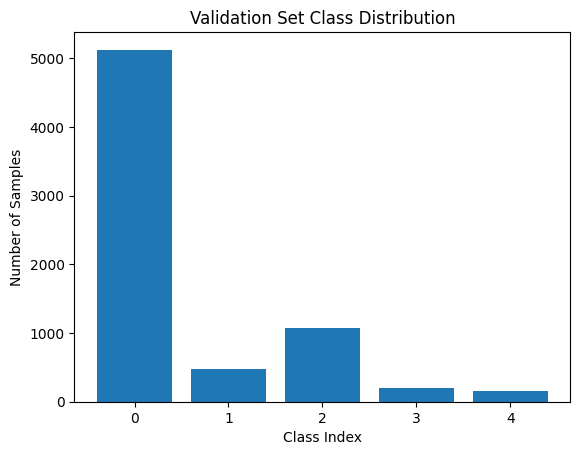

In [21]:
# Example 3 - Step 7: Check Class Distribution

import numpy as np
import matplotlib.pyplot as plt

# Count class distribution
val_labels = val_gen.classes
class_counts = np.bincount(val_labels)

# Plot distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel("Class Index")
plt.ylabel("Number of Samples")
plt.title("Validation Set Class Distribution")
plt.show()


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image32C.png)

The classes are clearly **NOT** balanced!

### Example 3 - Step 8: Setup `ResNet50` Base Network

The code in the cell below demonstrates how to use **transfer learning** with the **ResNet50** architecture for a custom image classification task involving 5 classes (i.e. degrees of diabetic retinopathy).

#### **What It Does**

- **Loads a pretrained `ResNet50 model`** (trained on ImageNet) without its top classification layer.
- **Freezes the base model's weights** to retain learned features and prevent them from being updated during training.
- **Adds custom layers** on top of the base model:
  - Global average pooling to reduce spatial dimensions.
  - Dense layer with ReLU activation for learning task-specific features.
  - Dropout for regularization to prevent overfitting.
  - Final softmax layer for multi-class classification (5 classes).
- **Compiles the model** using the `Adam optimizer` and `categorical crossentropy loss`, suitable for multi-class classification.

#### **Use Case**

This approach is ideal when:
- You have limited training data.
- You want to leverage powerful pretrained models.
- You need to adapt a general-purpose model to a specific classification task.

In [22]:
# ### Example 3 - Step 8: Setup ResNet50 base network

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers

base = ResNet50(weights='imagenet', include_top=False, input_shape=(244, 244, 3))
base.trainable = False          # keep the pretrained weights frozen

x = base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)

ResNet50_model_244 = models.Model(inputs=base.input, outputs=predictions)
ResNet50_model_244.compile(optimizer=optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image33C.png)

### Example 3 - Step 9: Train

In [28]:
# ### Example 3 - Step 8:

import time
import tensorflow as tf

# Set number of epochs
EPOCHS=10

# Set Patience
PATIENCE=3

# ------------------------------------------------------------------------
# 1️⃣  Start training
# ------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs----------------------------")
start_time = time.time()
history_244 = ResNet50_model_244.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    steps_per_epoch=len(train_gen),   # 28101 / 32 ≈ 878
    validation_steps=len(val_gen),    # 7025 / 32  ≈ 220
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=PATIENCE, restore_best_weights=True)
    ]
)

elapsed_time = time.time() - start_time
print(f"Elapsed time: {time.strftime('%H:%M:%S', time.gmtime(elapsed_time))}")

-- Training (classification) is starting for 10 epochs----------------------------
Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 380s 432ms/step - accuracy: 0.7441 - loss: 0.7584 - val_accuracy: 0.7412 - val_loss: 0.7501
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 380s 433ms/step - accuracy: 0.7492 - loss: 0.7409 - val_accuracy: 0.7460 - val_loss: 0.7264
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 380s 433ms/step - accuracy: 0.7488 - loss: 0.7387 - val_accuracy: 0.7463 - val_loss: 0.7256
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 384s 437ms/step - accuracy: 0.7507 - loss: 0.7360 - val_accuracy: 0.7470 - val_loss: 0.7246
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 380s 432ms/step - accuracy: 0.7476 - loss: 0.7446 - val_accuracy: 0.7515 - val_loss: 0.7203
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 381s 434ms/step - accuracy: 0.7510 - loss: 0.7356 - val_accuracy: 0.7483 - val_loss: 0.7217
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 381s 434ms/step - accuracy: 0.7501 - loss: 0.7309 - val_accuracy: 0.7499 - val_loss: 

If you tried to train this model using just a CPU without GPU hardware acceleration, it would take more than **17 hours** to complete 30 epochs!

If the code is correct you should see something similar to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image35C.png)

With COLABs best GPU accerator (`A100`) training for 10 epochs require a little over one hour to complete.

If you tried to train this model using just a CPU without GPU hardware acceleration, it would take more than 6 hours to complete 10 epochs!

------------------------------------------

### **What the epoch output actually tells you**

```text
Epoch 1/100
711/711 ----------------185s 176ms/step
```

* **Epoch 1/100** - You are training for up to 100 epochs (EarlyStopping may stop earlier).
* **711/711** - 711 batches were processed in this epoch (each of size 32).

There are 22753 images in the training set. If we divide these images into 32 batches the model will have process 711 batches to see of the training images.

* **185s** - Total time for the epoch (≈ 185 seconds).
* **176ms/step** - Average time per batch.


So, the number 711 is correct given the way you defined the number of steps. If you expected 22753 individual steps, you would need a batch size of 1, but that would be extremely slow.

---------------------

### Example 3 - Step 10:

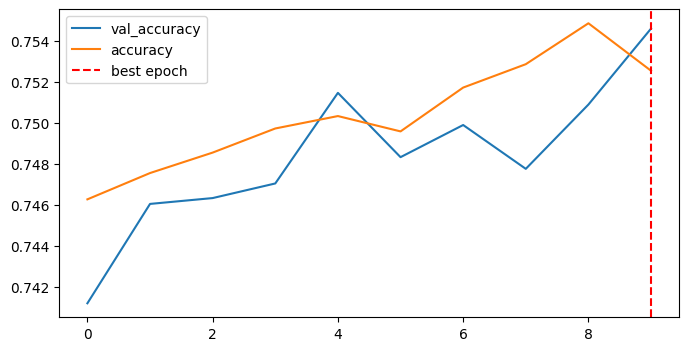

In [30]:
### Example 3 - Step 10:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history_244.history['val_accuracy'], label='val_accuracy')
plt.plot(history_244.history['accuracy'],   label='accuracy')
plt.axvline(history_244.params['epochs']-1, color='r', linestyle='--', label='best epoch')
plt.legend(); plt.show()


If the code is correct you should see something similar to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image36C.png)


### Example 3 - Step 11: Save Model to GDrive

Run the next cell to save your retrained ResNet model to your GDrive.

In [34]:
# Save the model to the GDrive

from google.colab import drive
import os
import tensorflow as tf
from keras.models import save_model

# Set model name
model_name = "ResNet50_model_244"

# 1️⃣  Build the path that includes the model_name string
save_path = f'/content/drive/My Drive/{model_name}'   #  <-- uses the variable

# 2️⃣  Tell Keras to write the model to that path
ResNet50_model_244.save(save_path)

# 6️⃣  Verify the file was created
# -----------------------------------------
print("Files in /content/drive/My Drive:")
print(os.listdir('/content/drive/My Drive'))   # or use os.listdir(save_dir) to see inside the folder


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/My Drive/ResNet50_model.

### Example 3 - Step 12: Delete Model from Current Directory

Run the next cell to delete `ResNet50_model.keras` from your current directory.

In [ ]:
# Example 3 - Step 12: Delete model from current directory

import os

# Set model name
modelName = "ResNet50_model_244"

# Specify the path to the file you want to delete
# file_path = '/content/drive/My Drive/retina_model.keras'

file_path = './ResNet50_model_244.keras'

# Check if the file exists before attempting to delete it
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"File {file_path} has been deleted from your current working directory.")
else:
    print(f"File {file_path} does not exist in your current working directory.")

File ./retina_model.keras does not exist in your current working directory.


### Example 3 - Step 13: Copy Model from GDrive

Run the next cell to delete `ResNet50_model.keras` from your current directory.

In [ ]:
# Example 3 - Step 13: Copy model from GDrive

import shutil

# Set model name
modelName = "ResNet50_model_244"

# Source path in Google Drive
source_path = '/content/drive/My Drive/ResNet50_model_244.keras'

# Destination path in the current working directory
destination_path = './ResNet50_model_244.keras'

# Copy the file
shutil.copy(source_path, destination_path)

# Verify the file has been copied
!ls -l

total 783964
-rw-r--r-- 1 root root 505127436 Aug 14 18:40 diabetic_retinopathy.zip
drwx------ 6 root root      4096 Aug 14 18:28 drive
-rw------- 1 root root 297631264 Aug 14 20:53 retina_model.keras
drwxr-xr-x 3 root root      4096 Aug 14 18:43 retinopathy
drwxr-xr-x 1 root root      4096 Aug 13 13:42 sample_data


# **EXERCISE 3**

![__](https://biologicslab.co/BIO1173/images/class_03/DiabeticRetinopathyData.png)

### Image Size Comparison

To find how much larger the `512×512×3` image is compared to the `244×244×3` image:



\[
\begin{aligned}
512 \times 512 \times 3 &= 786{,}432 \\
244 \times 244 \times 3 &= 178{,}608 \\
\frac{786{,}432}{178{,}608} &\approx 4.4
\end{aligned}
\]

So, the **512x512x3** image is approximately **4.4 times larger** than the **244×244×3** image in terms of pixel data.

### **Exercise 3 - Step 1: Set ENVIRONMENTAL VARIABLES**

The code in the cell below defines a number of `ENVIRONMENTAL VARIABLES` that are needed for later code cells. **Enivornment Variables** can  allow code to be **configurable without modification**. For example, you might use different database URLs for development, testing, and production environments.

In [78]:
# Example 3 - Step 1: Set ENVIRONMENTAL VARIABLES

import os

# ------------------------------------------------------------------------
# 1️⃣  Create variables for downloading loading Zip file
# ------------------------------------------------------------------------
URL = "https://biologicslab.co/BIO1173/data/"
DOWNLOAD_SOURCE = URL+"diabetic_retinopathy_train_512.zip"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print("DOWNLOAD_SOURCE=",DOWNLOAD_SOURCE)
print("DOWNLOAD_NAME=",DOWNLOAD_NAME)

# ------------------------------------------------------------------------
# 2️⃣  Create variables for extracting the Zip file
# ------------------------------------------------------------------------
PATH = "./"
EXTRACT_TARGET = os.path.join(PATH,"retinopathy_512")
SOURCE = os.path.join(EXTRACT_TARGET, "train_512")
print("EXTRACT_TARGET=",EXTRACT_TARGET)
print("SOURCE=",SOURCE)

# ------------------------------------------------------------------------
# 3️⃣  Print variables for debugging
# ------------------------------------------------------------------------
print("ENVIRONMENTAL VARIABLES were successfully created.")

DOWNLOAD_SOURCE= https://biologicslab.co/BIO1173/data/diabetic_retinopathy_train_512.zip
DOWNLOAD_NAME= diabetic_retinopathy_train_512.zip
EXTRACT_TARGET= ./retinopathy_512
SOURCE= ./retinopathy_512/train_512
ENVIRONMENTAL VARIABLES were successfully created.


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image37C.png)

In [57]:
!rm diabetic_retinopathy_512.zip

rm: cannot remove 'diabetic_retinopathy_512.zip': No such file or directory


In [82]:
!rm -rf ./retinopathy_512

In [ ]:
!mv ./retinopathy/train_600X400 ./retinopathy/train

In [83]:
!ls ./

diabetic_retinopathy_train_244.zip  drive  retinopathy_244  sample_data


### **Exercise 3 - Step 2: Download and Extract Image Data**

The code in the cell below downloads a zip file from the course HTTPS server, `https://biologicslab.co/BIO1173/data`, called `diabetic_retinopathy.zip`.

The code then extracts (unzips) the zip file into a new folder called `/retinopathy`.

**NOTE:** This Zip file is _substantially_ larger than the one you downloaded in Example 3. You can expect the it will take approximately **7 minutes** to download and unzip the image files.

Pleas be patient...

In [84]:
# Insert your code for Exericse 3 - Step 2 here

import os

# --------------------------------------------------------------
# 1️⃣  Create directories
# --------------------------------------------------------------
print("Creating necessary directories...", end='')
# Create necessary directories
os.makedirs(SOURCE, exist_ok=True)
os.makedirs(EXTRACT_TARGET, exist_ok=True)
print("done.")

# --------------------------------------------------------------
# 2️⃣  Download Zip file
# --------------------------------------------------------------
print("Downloading the Zip file...", end='')
# Define paths and URLs
download_path = os.path.join(PATH, DOWNLOAD_NAME)
extract_path = os.path.join(EXTRACT_TARGET, DOWNLOAD_NAME)
# Download the file
os.system(f"wget -O {DOWNLOAD_NAME} {DOWNLOAD_SOURCE}")
print("done.")

# --------------------------------------------------------------
# 3️⃣  Extract Zip file
# --------------------------------------------------------------
print("Extracting the Zip file...", end='')
# Extract the file
os.system(f"unzip -q {DOWNLOAD_NAME} -d {EXTRACT_TARGET}")
print("done.")

# --------------------------------------------------------------
# 4️⃣  Verity Extraction was sucessful
# --------------------------------------------------------------
print("Verify Extraction")
!ls -l {EXTRACT_TARGET} | head

Creating necessary directories...done.
Extracting the Zip file...done.
Verify Extraction
total 1584
drwxr-xr-x 2 root root 1150976 Aug 18 20:17 train_512
-rw-rw---- 1 root root  465317 Feb  6  2015 trainLabels.csv


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image38C.png)

In [85]:
!ls -Fla ./retinopathy_512/

total 1596
drwxr-xr-x 3 root root    4096 Aug 18 20:16 ./
drwxr-xr-x 1 root root    4096 Aug 18 20:11 ../
drwxr-xr-x 2 root root 1150976 Aug 18 20:17 train_512/
-rw-rw---- 1 root root  465317 Feb  6  2015 trainLabels.csv


### Example 3 - Step 3: Check Data

In [86]:
# Insert your code for Exericse 3 - Step 3 here

import os
import io
import shutil
from pathlib import Path
from PIL import Image

# SOURCE = Path("./retinopathy/train_244")   # root that you pass to flow_from_dataframe

# Set Delete
DELETE  = True     # set to False if you only want to *report* the bad files

# ------------------------------------------------------------------
# 3️⃣  Utility: test a single file (exactly how ImageDataGenerator does it)
# ------------------------------------------------------------------
def _is_good_image(path: Path) -> bool:
    """Return True if Pillow can read the image, False otherwise."""
    try:
        with path.open("rb") as f:
            data = f.read()
        Image.open(io.BytesIO(data)).convert("RGB")
        return True
    except Exception:
        return False

# ------------------------------------------------------------------
# 4️⃣  Scan the whole directory tree
# ------------------------------------------------------------------
bad_files = []

for root, _dirs, files in os.walk(SOURCE):
    for fn in files:
        p = Path(root) / fn
        if not _is_good_image(p):
            bad_files.append(p)

print(f"Found {len(bad_files)} corrupt / unreadable images in {SOURCE}")

# ------------------------------------------------------------------
# 5️⃣  Delete (or rename) the bad files
# ------------------------------------------------------------------
if bad_files:
    if DELETE:
        for p in bad_files:
            try:
                # rename so you still have a copy you can inspect
                backup = p.with_suffix(p.suffix + ".corrupt")
                p.rename(backup)
                print(f"  → renamed {p} → {backup}")
            except OSError as e:
                print(f"  !! could not rename {p}: {e}")
        print(f"All {len(bad_files)} bad files have been renamed.")
    else:
        print("Set DELETE=True if you want to actually delete/rename them.")
else:
    print("No bad files to delete – you’re good to go!")

Found 2 corrupt / unreadable images in ./retinopathy_512/train_512
  → renamed retinopathy_512/train_512/info.height?info.height:info.width]x%[fx:info.width → retinopathy_512/train_512/info.height?info.height:info.width]x%[fx:info.width.corrupt
  → renamed retinopathy_512/train_512/info.height?info.height:info.width]+0+0 → retinopathy_512/train_512/info.height?info.height:info.width]+0+0.corrupt
All 2 bad files have been renamed.


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image39C.png)

### Example 3 - Step 4: Load the Labels for the Training Set

The file `train.csv` contains the label information for the images. This file has just two columns, **image** and **level**. The `image` specifies the image's filename and from which eye the image was obtained; for example, `10_left.jpeg`. The `level` column contains the a numerical value between 0 and 3 which indicates the serverity of diabetic retinopathy.

Our objective is to build a classification neural network that can learn to classify retinal images into one of the three categories.

The code in the cell below reads the file `train.csv` and creates a Pandas dataframe called `df` and then prints out some examples for inspection.

In [87]:
# Insert your code for Exericse 3 - Step 4 here

import pandas as pd

# Read labels and create dataframe
df_raw = pd.read_csv(
        os.path.join(EXTRACT_TARGET,"trainLabels.csv"),
        na_values=['NA', '?'])

# Add file extention
image_col = 'image'
df_raw[image_col] = df_raw[image_col].astype(str) + '.png'

# Print sample for verification
df_raw

,image,level
0,10_left.png,0
1,10_right.png,0
2,13_left.png,0
3,13_right.png,0
4,15_left.png,1
...,...,...
35121,44347_right.png,0
35122,44348_left.png,0
35123,44348_right.png,0
35124,44349_left.png,0


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image40C.png)

### Example 3 - Step 5: Split Images into Training and Validation sets

The code in the cell below, splits the retinal images into a training set and a validation set, with 80% of the images going into the training set.

The number images in both sets is printed out.

In [88]:
# Insert your code for Exericse 3 - Step 5 here

# Set split fraction
FRAC=0.8

# Convert the class column to string – required for `flow_from_dataframe`
df_raw['level'] = df_raw['level'].astype(str)

# Split data into training and validation sets
df_train = df_raw.sample(frac=FRAC, random_state=42)
df_val   = df_raw.drop(df_train.index)

# Calculate the split fraction as sanity check
split_fraction = len(df_train) / (len(df_val) + len(df_train))

# Print out numbers
print(f"Training set size   : {len(df_train)}")
print(f"Validation set size : {len(df_val)}")
print(f"Calculated split fraction =", split_fraction)

# Quick sanity check
print("\nSample training rows:")
print(df_train[['image', 'level']].head())

print("\nSample validation rows:")
print(df_val[['image', 'level']].head())


Training set size   : 28101
Validation set size : 7025
Calculated split fraction = 0.8000056937880772

Sample training rows:
                 image level
19025  23997_right.png     0
10159  12793_right.png     0
14413  18073_right.png     0
8910    11182_left.png     0
33989  42966_right.png     0

Sample validation rows:
           image level
9   17_right.png     1
16   22_left.png     0
24   31_left.png     0
25  31_right.png     0
53  58_right.png     0


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image41C.png)

### Example 3 - Step 6: Create Image Generator

In [89]:
# Insert your code for Exericse 3 - Step 6 here

from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Specify value
#BASE_PATH   = Path("./retinopathy/train_512")
IMG_W, IMG_H = 512, 512 # target size
BATCH_TRAIN  = 32
BATCH_VAL    = 32

# --------------------------------------------------------------------
# 3.1  Training generator – rescale + a few light augmentations
# --------------------------------------------------------------------
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,   # this is the *ResNet* pre‑proc
    horizontal_flip=True,
    fill_mode='nearest',
)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=str(SOURCE),
    x_col='image',          # column that holds the file name
    y_col='level',          # column that holds the class string
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_TRAIN,
    class_mode='categorical',   # one‑hot (shape (batch, 5))
    shuffle=True,
)

# --------------------------------------------------------------------
# 3.2  Validation generator – only rescale, no augmentation
# --------------------------------------------------------------------
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=str(SOURCE),
    x_col='image',
    y_col='level',
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_VAL,
    class_mode='categorical',
    shuffle=False,
)

# Sanity Check
x_train, y_train = next(train_gen)
x_val,   y_val   = next(val_gen)

print("TRAIN batch  : ", x_train.shape, y_train.shape)   # should be (32, 244, 244, 3) , (32, 5)
print("VAL   batch  : ", x_val.shape,   y_val.shape)     # same, but 32 samples if 7025>batch


Found 28101 validated image filenames belonging to 5 classes.
Found 7025 validated image filenames belonging to 5 classes.
TRAIN batch  :  (32, 512, 512, 3) (32, 5)
VAL   batch  :  (32, 512, 512, 3) (32, 5)


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image42C.png)

### Example 3 - Step 7: Check Class Distribution

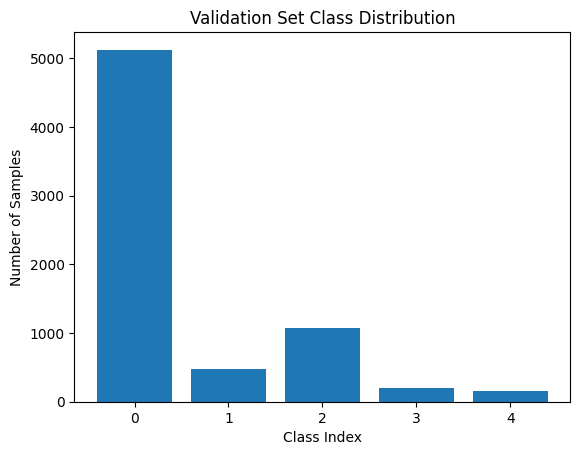

In [90]:
# Example 3 - Step 7: Check Class Distribution

import numpy as np
import matplotlib.pyplot as plt

# Count class distribution
val_labels = val_gen.classes
class_counts = np.bincount(val_labels)

# Plot distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel("Class Index")
plt.ylabel("Number of Samples")
plt.title("Validation Set Class Distribution")
plt.show()


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image43C.png)

### Example 3 - Step 8:

In [92]:
# ### Example 3 - Step 8:

from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models, optimizers

base = ResNet101(weights='imagenet', include_top=False, input_shape=(512, 512, 3))
base.trainable = False          # keep the pretrained weights frozen

x = base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)

ResNet101_model_512 = models.Model(inputs=base.input, outputs=predictions)
ResNet101_model_512.compile(optimizer=optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image44C.png)

### Example 3 - Step 9:

In [93]:
# ### Example 3 - Step 8:
import time
import tensorflow as tf

# Set number of epochs
EPOCHS=10

# Set Patience
PATIENCE=3

# ------------------------------------------------------------------------
# 1️⃣  Start training
# ------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs----------------------------")
start_time = time.time()
history_512 = ResNet101_model_512.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    steps_per_epoch=len(train_gen),   # 28101 / 32 ≈ 878
    validation_steps=len(val_gen),    # 7025 / 32  ≈ 220
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=PATIENCE, restore_best_weights=True)
    ]
)

elapsed_time = time.time() - start_time
print(f"Elapsed time: {time.strftime('%H:%M:%S', time.gmtime(elapsed_time))}")

-- Training (classification) is starting for 10 epochs----------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 447s 486ms/step - accuracy: 0.7073 - loss: 0.9310 - val_accuracy: 0.7352 - val_loss: 0.7549
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 408s 464ms/step - accuracy: 0.7431 - loss: 0.7750 - val_accuracy: 0.7426 - val_loss: 0.7329
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 408s 464ms/step - accuracy: 0.7500 - loss: 0.7480 - val_accuracy: 0.7517 - val_loss: 0.7130
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 410s 466ms/step - accuracy: 0.7583 - loss: 0.7215 - val_accuracy: 0.7539 - val_loss: 0.7042
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 412s 469ms/step - accuracy: 0.7591 - loss: 0.7122 - val_accuracy: 0.7589 - val_loss: 0.6924
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 414s 471ms/step - accuracy: 0.7692 - loss: 0.6933 - val_accuracy: 0.7601 - val_loss: 0.6863
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 415s 472ms/step - accuracy: 0.7630 - loss: 0.6941 - val_accuracy: 0.7674 - val_loss: 0.6761
Epoch 8/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 414s 471ms/step - accuracy: 0.7641 -

If the code is correct you should see something similar to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image45C.png)

It should be noted that while the images in `train_512` were more than 4X larger (by pixel count) the training time was essentially the same, ~ 1hr.

### Example 3 - Step 10:

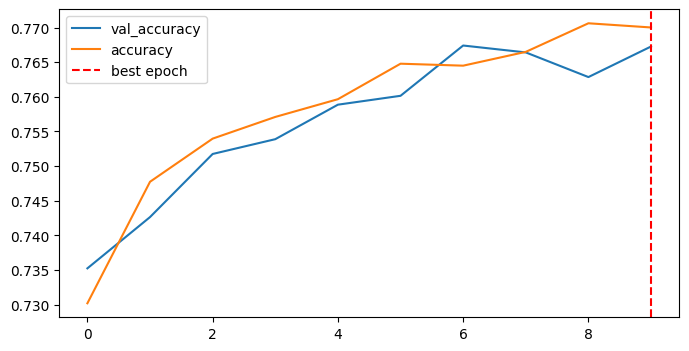

In [94]:
### Example 3 - Step 10:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history_512.history['val_accuracy'], label='val_accuracy')
plt.plot(history_512.history['accuracy'],   label='accuracy')
plt.axvline(history_512.params['epochs']-1, color='r', linestyle='--', label='best epoch')
plt.legend(); plt.show()


If the code is correct you should see something similar to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image46C.png)

### Example 3 - Step 11: Save Model to GDrive

Run the next cell to save your retrained ResNet model to your GDrive.

In [101]:
# Insert your code for Example 3 - Step 11 here

# ---- your existing code ----------------------------------------------------
model_name = "ResNet101_model_512"
save_path  = f'/content/drive/My Drive/{model_name}'   # directory

# Make sure the folder exists
os.makedirs(save_path, exist_ok=True)

# Save the model as a single Keras file
ResNet101_model_512.save(f'{save_path}.keras')

# Show contents in a *vertical* list
drive_root = '/content/drive/My Drive'

# Simple loop (each item on a new line)
print("\nContents of", drive_root + ":")
for entry in sorted(os.listdir(drive_root)):
    print(f"  {entry}")



Contents of /content/drive/My Drive:
  BIO5853
  Colab Notebooks
  EBooks
  Login
  MLF13_IM_200930_0.pdf
  MountainCar
  ResNet101_model_512
  ResNet101_model_512.keras
  TheMovie4.avi
  VPS.txt
  VPS_address.txt
  biologicslab.co.txt
  kaggle.json
  openai_api_key.txt
  projects
  regress_model.keras
  retina_model.keras
  tavily_api_key.txt


### Example 3 - Step 12: Delete Model from Current Directory

Run the next cell to delete `ResNet101_model_512.keras` from your current directory.

In [102]:
import os
import shutil
import tensorflow as tf

# --------------------------------------------------------------
# 1️⃣  Mount Google Drive (do this only once per session)
# --------------------------------------------------------------
# from google.colab import drive
# drive.mount('/content/drive')

# --------------------------------------------------------------
# 2️⃣  Define the names / paths
# --------------------------------------------------------------
model_name     = "ResNet101_model_512"                    # model object name
gdrive_dir     = f"/content/drive/My Drive/{model_name}"  # folder on Drive
gdrive_file    = f"{gdrive_dir}.keras"                    # the file we want to keep

local_dir      = f"/content/{model_name}"                 # the *local* folder you want to delete
local_file     = f"{local_dir}.keras"                    # if you saved a single file locally

# --------------------------------------------------------------
# 3️⃣  Make sure the Drive folder exists
# --------------------------------------------------------------
os.makedirs(gdrive_dir, exist_ok=True)

# --------------------------------------------------------------
# 4️⃣  Save the model *on* Drive (kept forever)
# --------------------------------------------------------------
ResNet101_model_512.save(gdrive_file)   # <-- this writes the file into /content/drive/My Drive/

# --------------------------------------------------------------
# 5️⃣  OPTIONAL: Verify the Drive copy exists
# --------------------------------------------------------------
print("Drive copy present:", os.path.exists(gdrive_file))

# --------------------------------------------------------------
# 6️⃣  Delete the *local* copy – only if it exists
# --------------------------------------------------------------
def safe_delete(path):
    """Delete a file or directory if it exists."""
    if os.path.isdir(path):
        shutil.rmtree(path)     # removes folder + all contents
        print(f"Deleted folder: {path}")
    elif os.path.isfile(path):
        os.remove(path)         # removes single file
        print(f"Deleted file: {path}")
    else:
        print(f"No local copy found at: {path}")

# Delete the folder *or* the single .keras file – whichever you used
safe_delete(local_dir)    # or safe_delete(local_file)

# --------------------------------------------------------------
# 7️⃣  Final sanity check
# --------------------------------------------------------------
print("\nFiles in /content/drive/My Drive:")
print("\n".join(sorted(os.listdir("/content/drive/My Drive"))))


Drive copy present: True
No local copy found at: /content/ResNet101_model_512

Files in /content/drive/My Drive:
BIO5853
Colab Notebooks
EBooks
Login
MLF13_IM_200930_0.pdf
MountainCar
ResNet101_model_512
ResNet101_model_512.keras
TheMovie4.avi
VPS.txt
VPS_address.txt
biologicslab.co.txt
kaggle.json
openai_api_key.txt
projects
regress_model.keras
retina_model.keras
tavily_api_key.txt


### Example 3 - Step 13: Copy Model from GDrive

Run the next cell to delete `ResNet50_model.keras` from your current directory.

In [105]:
# ----------------------------------------------
# 1️⃣  Mount Google Drive (run once per session)
# ----------------------------------------------
#from google.colab import drive
#drive.mount('/content/drive')

# ----------------------------------------------
# 2️⃣  Define the paths
# ----------------------------------------------
gdrive_file = '/content/drive/My Drive/ResNet101_model_512.keras'   # the file you saved earlier
local_file  = '/content/ResNet101_model_512.keras'                   # destination in Colab

# ----------------------------------------------
# 3️⃣  Load the model from Drive into memory
# ----------------------------------------------
import tensorflow as tf

print("Loading model from GDrive ...")
model = tf.keras.models.load_model(gdrive_file)
print("Model loaded into memory")

# ----------------------------------------------
# 4️⃣  (Optional) Save a copy locally
# ----------------------------------------------
print(f"Copying model to local path: {local_file}")
model.save(local_file)          # writes the same .keras file into the Colab folder
print("Local copy created")

# ----------------------------------------------
# 5️⃣  Quick sanity check – list the local folder
# ----------------------------------------------
import os
print("\nFiles now present in /content:")
#print("\n".join(sorted(os.listdir('/'))))
!ls


Loading model from GDrive ...
Model loaded into memory
Copying model to local path: /content/ResNet101_model_512.keras
Local copy created

Files now present in /content:
diabetic_retinopathy_train_244.zip  ResNet101_model_512.keras  sample_data
diabetic_retinopathy_train_512.zip  retinopathy_244
drive				    retinopathy_512


## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_03_2.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**


## **BASIC**

![__](https://upload.wikimedia.org/wikipedia/commons/7/7b/AtariBASIC.png)

# Introduction to BASIC Programming Language

## What is BASIC?

**BASIC** (Beginner's All-purpose Symbolic Instruction Code) is a high-level programming language designed to be easy to learn and use. It was created with the goal of providing access to computing power for students and non-professional programmers, emphasizing simplicity and readability.

BASIC uses straightforward syntax and commands that resemble English, making it an ideal first language for beginners. Over time, it has evolved into many dialects and influenced the development of numerous other programming languages.

---

## Historical Summary

### Origins

- **Year Created**: 1964  
- **Creators**: John G. Kemeny and Thomas E. Kurtz  
- **Institution**: Dartmouth College

Kemeny and Kurtz developed BASIC to enable students in fields other than science and mathematics to use computers. At the time, most programming languages were complex and required deep technical knowledge. BASIC was designed to democratize computing.

### Key Milestones

- **1964**: First implementation of BASIC on a GE-225 mainframe at Dartmouth College.
- **1970s**: BASIC became widely adopted on microcomputers, especially with the rise of personal computing.
- **1975**: Microsoft was founded to develop a version of BASIC (Altair BASIC) for the Altair 8800, marking the beginning of Microsoft's software empire.
- **1980s**: Variants like GW-BASIC, QuickBASIC, and Turbo BASIC became popular on MS-DOS systems.
- **1991**: Microsoft introduced Visual Basic, combining BASIC with a graphical user interface (GUI) development environment.
- **2000s–Present**: Modern dialects like VB.NET continue to be used, especially in enterprise and educational settings.

### Legacy

BASIC played a crucial role in the early days of personal computing. It introduced millions of people to programming and laid the foundation for many modern languages. While its use has declined in favor of more powerful and flexible languages, its influence remains significant in the history of computer science.

---

## Example BASIC Code

```basic
10 PRINT "HELLO, WORLD!"
20 END

**BASIC (Beginners' All-purpose Symbolic Instruction Code)** is a family of general-purpose, high-level programming languages designed for ease of use. The original version was created by John G. Kemeny and Thomas E. Kurtz at Dartmouth College in 1963. They wanted to enable students in non-scientific fields to use computers. At the time, nearly all computers required writing custom software, which only scientists and mathematicians tended to learn.

In addition to the programming language, Kemeny and Kurtz developed the Dartmouth Time-Sharing System (DTSS), which allowed multiple users to edit and run BASIC programs simultaneously on remote terminals. This general model became popular on minicomputer systems like the PDP-11 and Data General Nova in the late 1960s and early 1970s. Hewlett-Packard produced an entire computer line for this method of operation, introducing the HP2000 series in the late 1960s and continuing sales into the 1980s. Many early video games trace their history to one of these versions of BASIC.

The emergence of microcomputers in the mid-1970s led to the development of multiple BASIC dialects, including Microsoft BASIC in 1975. Due to the tiny main memory available on these machines, often 4 KB, a variety of Tiny BASIC dialects were also created. BASIC was available for almost any system of the era, and became the de facto programming language for home computer systems that emerged in the late 1970s. These PCs almost always had a BASIC interpreter installed by default, often in the machine's firmware or sometimes on a ROM cartridge.

BASIC declined in popularity in the 1990s, as more powerful microcomputers came to market and programming languages with advanced features (such as Pascal and C) became tenable on such computers. By then, most nontechnical personal computer users relied on pre-written applications rather than writing their own programs. In 1991, Microsoft released Visual Basic, combining an updated version of BASIC with a visual forms builder. This reignited use of the language and "VB" remains a major programming language in the form of VB.NET, while a hobbyist scene for BASIC more broadly continues to exist.

**Origin**

John G. Kemeny was the chairman of the Dartmouth College Mathematics Department. Based largely on his reputation as an innovator in math teaching, in 1959 the college won an Alfred P. Sloan Foundation award for \$500,000 to build a new department building. Thomas E. Kurtz had joined the department in 1956, and from the 1960s Kemeny and Kurtz agreed on the need for programming literacy among students outside the traditional STEM fields. Kemeny later noted that "Our vision was that every student on campus should have access to a computer, and any faculty member should be able to use a computer in the classroom whenever appropriate. It was as simple as that."

Kemeny and Kurtz had made two previous experiments with simplified languages, DARSIMCO (Dartmouth Simplified Code) and DOPE (Dartmouth Oversimplified Programming Experiment). These did not progress past a single freshman class. New experiments using Fortran and ALGOL followed, but Kurtz concluded these languages were too tricky for what they desired. As Kurtz noted, Fortran had numerous oddly formed commands, notably an "almost impossible-to-memorize convention for specifying a loop: DO 100, I = 1, 10, 2. Is it '1, 10, 2' or '1, 2, 10', and is the comma after the line number required or not?"

Moreover, the lack of any sort of immediate feedback was a key problem; the machines of the era used batch processing and took a long time to complete a run of a program. While Kurtz was visiting MIT, John McCarthy suggested that time-sharing offered a solution; a single machine could divide up its processing time among many users, giving them the illusion of having a (slow) computer to themselves.[8] Small programs would return results in a few seconds. This led to increasing interest in a system using time-sharing and a new language specifically for use by non-STEM students.

Kemeny wrote the first version of BASIC. The acronym BASIC comes from the name of an unpublished paper by Thomas Kurtz.The new language was heavily patterned on FORTRAN II; statements were one-to-a-line, numbers were used to indicate the target of loops and branches, and many of the commands were similar or identical to Fortran. However, the syntax was changed wherever it could be improved. For instance, the difficult to remember DO loop was replaced by the much easier to remember FOR I = 1 TO 10 STEP 2, and the line number used in the DO was instead indicated by the NEXT I. Likewise, the cryptic IF statement of Fortran, whose syntax matched a particular instruction of the machine on which it was originally written, became the simpler IF I=5 THEN GOTO 100. These changes made the language much less idiosyncratic while still having an overall structure and feel similar to the original FORTRAN.

The project received a $300,000 grant from the National Science Foundation, which was used to purchase a GE-225 computer for processing, and a Datanet-30 realtime processor to handle the Teletype Model 33 teleprinters used for input and output. A team of a dozen undergraduates worked on the project for about a year, writing both the DTSS system and the BASIC compiler. The first version BASIC language was released on 1 May 1964.

Initially, BASIC concentrated on supporting straightforward mathematical work, with matrix arithmetic support from its initial implementation as a batch language, and character string functionality being added by 1965. Usage in the university rapidly expanded, requiring the main CPU to be replaced by a GE-235,[7] and still later by a GE-635. By the early 1970s there were hundreds of terminals connected to the machines at Dartmouth, some of them remotely.

Wanting use of the language to become widespread, its designers made the compiler available free of charge. In the 1960s, software became a chargeable commodity; until then, it was provided without charge as a service with expensive computers, usually available only to lease. They also made it available to high schools in the Hanover, New Hampshire, area and regionally throughout New England on Teletype Model 33 and Model 35 teleprinter terminals connected to Dartmouth via dial-up phone lines, and they put considerable effort into promoting the language. In the following years, as other dialects of BASIC appeared, Kemeny and Kurtz's original BASIC dialect became known as Dartmouth BASIC.

New Hampshire recognized the accomplishment in 2019 when it erected a highway historical marker in Hanover describing the creation of "the first user-friendly programming language".